In [2]:
import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

(sec:eda_feature_types)=
# Feature Types

Before making an exploratory plot, or any plot for that matter, it's a good idea to examine the feature (or features) and decide on its *feature type*. (Sometimes we refer to a feature as a _variable_ and its type as *variable type*.) Although there are multiple ways of categorizing feature types, in this book we consider three basic ones:

*Nominal*
: A feature that represents "named" categories, where the categories do not have a natural ordering, is called nominal. Examples include political party affiliation (Democrat, Republican, Green, Other); dog type (herding, hound, non-sporting, sporting, terrier, toy, working); and computer operating system (Windows, macOS, Linux).

*Ordinal*
: Measurements that represent ordered categories are called ordinal. Examples of ordinal features are t-shirt size (small, medium, large); Likert-scale response (disagree, neutral, agree); and level of education (high school, college, graduate school). It is important to
note that with an ordinal feature, the difference between, say, small and
medium need not be the same as the difference between medium and large. Also, the differences between consecutive categories may not even be quantifiable. Think of the number of stars in a restaurant review
and what one star means in comparison to two stars. 

Ordinal and nominal data are subtypes of *categorical* data. Another name
for categorical data is *qualitative*. In contrast, we also have
*quantitative* features:


*Quantitative*
: Data that represent numeric measurements or quantities
are called quantitative. Examples include height measured to the
nearest cm, price reported in USD, and distance measured to the nearest
km.  Quantitative features can be further divided into
*discrete*, meaning that only a few values of the feature are possible, and
*continuous*, meaning that the quantity could in principle be measured to
arbitrary precision. The number of siblings in a family takes on a discrete
set of values (such as 0, 1, 2,..., 8). In contrast, height can theoretically be
reported to any number of decimal places, so we consider it continuous.
There is no hard and fast rule to determine whether a quantity is discrete or continuous. In some cases, it can be a judgment call, and in others, we may want to purposefully consider a continuous feature to be discrete. 

A feature type is not the same thing as a data storage type. Each column in a  `pandas` dataframe has its own *storage type*. These types can be integer, floating point, boolean, date-time format, category, and object (strings of varying length are stored as objects in Python with pointers to the strings).
We use the term *feature type* to refer to a
conceptual notion of the information and the term *storage type* to refer to the
representation of the information in the computer.

A feature stored as an integer can represent nominal data, strings can be
quantitative (like `"\$100.00"`),  and, in practice, boolean values often
represent nominal features that have only two possible values.


:::{note}

`pandas` calls the storage type `dtype`, which is short for data type.
We refrain from using the term *data type* here because it can be confused with
both storage type and feature type.

:::

In order to determine a feature type, we often need to consult a
dataset’s *data dictionary* or *codebook*. A data dictionary is a document
included with the data that describes what each column in the data table
represents.  In the following example, we take a look at the storage and
feature types of the columns in a dataframe about various dog breeds, 
and we find that the storage type is often not a good indicator of the kind 
of information contained in a field.

## Example: Dog Breeds

We use the [American Kennel Club (AKC)](https://www.akc.org) data on registered dog breeds to introduce the various concepts related to EDA. The AKC, a nonprofit that was founded in 1884, has the stated mission to "advance the study, breeding, exhibiting, running and maintenance of purebred dogs."  The AKC organizes events like the National Championship, Agility Invitational, and Obedience Classic, and mixed-breed dogs are welcome to participate in most events. The [Information Is Beautiful](https://informationisbeautiful.net) website provides a dataset with information from the AKC on 172 breeds. Its visualization, [Best in Show](https://www.informationisbeautiful.net/visualizations/best-in-show-whats-the-top-data-dog/), incorporates many features of the breeds and is fun to look at.

The AKC dataset contains several different kinds of features, and we have extracted a handful of them that show a variety of types of information. These features include the name of the breed; its longevity, weight, and height; and other information such as its suitability for children and the number of repetitions needed to learn a new trick. Each record in the dataset is a breed of dog, and the information provided is meant to be typical of that breed.

Let's read the data into a dataframe:

In [3]:
dogs = pd.read_csv('data/akc.csv')
dogs

,breed,group,score,longevity,...,size,weight,height,repetition
0,Border Collie,herding,3.64,12.52,...,medium,NaN,51.0,<5
1,Border Terrier,terrier,3.61,14.00,...,small,6.0,NaN,15-25
2,Brittany,sporting,3.54,12.92,...,medium,16.0,48.0,5-15
...,...,...,...,...,...,...,...,...,...
169,Wire Fox Terrier,terrier,NaN,13.17,...,small,8.0,38.0,25-40
170,Wirehaired Pointing Griffon,sporting,NaN,8.80,...,medium,NaN,56.0,25-40
171,Xoloitzcuintli,non-sporting,NaN,NaN,...,medium,NaN,42.0,NaN


A cursory glance at the table shows us that breed, group, and size appear to be
strings, and the other columns numbers. The summary of the dataframe, shown
here, provides the index, name, count of non-null values, and `dtype` for each column:

In [36]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   breed           172 non-null    object 
 1   group           172 non-null    object 
 2   score           87 non-null     float64
 3   longevity       135 non-null    float64
 4   ailments        148 non-null    float64
 5   purchase_price  146 non-null    float64
 6   grooming        112 non-null    float64
 7   children        112 non-null    float64
 8   size            172 non-null    object 
 9   weight          86 non-null     float64
 10  height          159 non-null    float64
 11  repetition      132 non-null    object 
dtypes: float64(8), object(4)
memory usage: 16.2+ KB


Several columns of this dataframe have a numeric computational type, as
signified by  `float64`, which means that the column can contain numbers other than integers.
We also confirm that `pandas` encodes the string columns as the `object` `dtype`, rather than a `string` `dtype`.
Notice that we guessed incorrectly that `repetition` is quantitative.
Looking a bit more carefully at the data table, we see that `repetition` contains string values for ranges,
such as `"<5"`, `"15-25"`, and `"25-40"`,  so this feature is ordinal.

:::{note}

In computer architecture, a floating-point number, or "float" for short, 
refers to a number that can have a decimal component. We won't go in depth
into computer architecture in this book, but we will point it out when it
affects terminology, as in this case.
The `dtype` `float64` says that the column contains decimal numbers that each
take up 64 bits of space when stored in computer memory.

Additionally, `pandas` uses optimized storage types for numeric data, like `float64` or `int64`.
However, it doesn't have optimizations for Python objects like strings,
dictionaries, or sets, so these are all stored as the `object` `dtype`.
This means that the storage type is ambiguous, but in most settings
we know whether `object` columns contain strings or some other Python type.

:::

Looking at the column storage types, we might guess `ailments` and `children` are quantitative
features because they are stored as `float64` `dtype`s. 
But let's tally their unique values:

In [37]:
display_df(dogs['ailments'].value_counts(), rows=8)

ailments
0.0    61
1.0    42
2.0    24
4.0    10
3.0     6
5.0     3
9.0     1
8.0     1
Name: count, dtype: int64

In [38]:
dogs['children'].value_counts()

children
1.0    67
2.0    35
3.0    10
Name: count, dtype: int64

Both `ailments` and `children` only take on a few integer values.
What does a value
of `3.0` for `children` or `9.0` for `ailments` mean? We need more information to
figure this out. The name of the column and how the information is stored in
the dataframe is not enough.
Instead, we consult the data dictionary shown in {numref}`Table %s <akc-codebook>`.

:::{table} AKC dog breed codebook
:name: akc-codebook

| Feature        | Description                                                                                   |
|----------------|-----------------------------------------------------------------------------------------------|
| `breed`          | Dog breed, e.g., Border Collie, Dalmatian, Vizsla                                             |
| `group`          | American Kennel Club grouping (herding, hound, non-sporting, sporting, terrier, toy, working) |
| `score`          | AKC score                                                                                     |
| `longevity`      | Typical lifetime (years)                                                                      |
| `ailments`       | Number of serious genetic ailments                                                            |
| `purchase_price` | Average purchase price from puppyfind.com                                                     |
| `grooming`       | Grooming required once every: 1 = day, 2 = week, 3 = few weeks                                |
| `children`       | Suitability for children: 1 = high, 2 = medium, 3 = low                                       |
| `size`           | Size: small, medium, large                                                                    |
| `weight`         | Typical weight (kg)                                                                           |
| `height`         | Typical height from the shoulder (cm)                                                         |
| `repetition`     | Number of repetitions to understand a new command: <5, 5–15, 15–25, 25–40, 40–80, >80         |

:::

Although the data dictionary does not explicitly specify the feature types, the
description is enough for us to figure out that the feature `children` represents the suitability of
the breed for children, and a value of `1.0` corresponds to "high" suitability.
We also find that the feature `ailments` is a count of the number of serious genetic
ailments that dogs of this breed tend to have.  Based on the codebook, we treat
`children` as a categorical feature, even though it is stored as a floating-point number, and since low < medium < high, the feature is ordinal.  Since
`ailments` is a count, we treat it as a quantitative (numeric) type,
and for some analyses we further define it as discrete because there
are only a few possible values that `ailments` can take on.

The codebook also confirms that the features `score`, `longevity`,
`purchase_price`, `weight`, and `height` are quantitative. 
The idea here is that numeric features have values that can be compared through differences. 
It makes sense to say that chihuahuas typically live about four years longer than dachshunds (16.5 versus 12.6 years). Another check is whether it makes sense to compare ratios of values:
a dachshund is usually about five times heavier than a chihuahua (11 kg versus 2 kg).
All of these quantitative features are continuous; only `ailments` is discrete.

The data dictionary descriptions for `breed`, `group`, `size`, and `repetition`
suggest that these features are qualitative. Each variable has
different, and yet commonly found, characteristics that are worth exploring a
bit more. We do this by examining the counts of each unique value for the various
features. We begin with `breed`:

In [39]:
dogs['breed'].value_counts()

breed
Border Collie       1
Great Pyrenees      1
English Foxhound    1
                   ..
Saluki              1
Giant Schnauzer     1
Xoloitzcuintli      1
Name: count, Length: 172, dtype: int64

The `breed` feature has 172 unique values---that's the same as the number of
records in the dataframe---so we can think of `breed` as the *primary key* for the data table. 
By design, each dog breed has one record, and this `breed` feature determines
the dataset's granularity.  Although `breed` is also considered a nominal feature,
it doesn't really make sense to analyze it. We do want to confirm that all
values are unique and clean, but otherwise we would only use it to, say, label
unusual values in a plot.

Next, we examine the feature `group`:

In [40]:
dogs['group'].value_counts()

group
terrier         28
sporting        28
working         27
hound           26
herding         25
toy             19
non-sporting    19
Name: count, dtype: int64

This feature has seven unique values.
Since a dog breed labeled as "sporting" and another considered to be "toy"
differ from each other in several ways, the categories cannot be easily reduced to an ordering.
So we consider `group` a nominal feature. 
Nominal features do not provide meaning in even the direction of the differences. 

Next, we examine the unique values and their counts for `size`: 

In [41]:
dogs['size'].value_counts()

size
medium    60
small     58
large     54
Name: count, dtype: int64

The `size` feature has a natural ordering: small < medium < large, so it is
ordinal.  We don't know how the category "small" is determined, but we do know
that a small breed is in some sense smaller than a medium-sized breed, which is
smaller than a large one.  We have an ordering, but differences and ratios
don't make sense conceptually for this feature.

The `repetition` feature is an example of a quantitative variable that has been
collapsed into categories to become ordinal. The codebook tells us that
`repetition` is the number of times a new command needs to be repeated before
the dog understands it:

In [42]:
dogs['repetition'].value_counts()

repetition
25-40     39
15-25     29
40-80     22
5-15      21
80-100    11
<5        10
Name: count, dtype: int64

The numeric values have been lumped together as
`<5`, `5-15`, `15-25`, `25-40`, `40-80`, `80-100`, and notice that these categories have different widths. The first has 5 repetitions, while others are 10, 15, and 40 repetitions wide.  The ordering is
clear, but the gaps from one category to the next are not of the same magnitude.

Now that we have double-checked the values in the variables against the
descriptions in the codebook, we can augment the data dictionary to include
this additional information about the feature types.
Our revised dictionary appears in {numref}`Table %s <revised-akc-codebook>`.

:::{table} Revised AKC dog breed codebook
:name: revised-akc-codebook

| Feature        |  Description                                                                                |  Feature type             |  Storage type
|:----------------|:-------------------------------------------------------------------------------------|:---------------------------|:----------------
`breed`           |  Dog breed, e.g., Border Collie, Dalmatian, Vizsla                                          |  primary key              |  string
`group`           |  AKC group (herding, hound, non-sporting, sporting, terrier, toy, working)                  |  qualitative - nominal    |  string
score           |  AKC `score`                                                                                  |  quantitative             |  floating point
`longevity`       |  Typical lifetime (years)                                                                   |  quantitative             |  floating point
`ailments`        |  Number of serious genetic ailments (0, 1, ..., 9)                                          |  quantitative - discrete  |  floating point
`purchase_price`  |  Average purchase price from puppyfind.com                                                  |  quantitative             |  floating point
`grooming`        |  Groom once every: 1 = day, 2 = week, 3 = few weeks                                         |  qualitative - ordinal    |  floating point
`children`        |  Suitability for children: 1 = high, 2 = medium, 3 = low                                    |  qualitative - ordinal    |  floating point
`size`            |  Size: small, medium, large                                                                 |  qualitative - ordinal    |  string
`weight`          |  Typical weight (kg)                                                                        |  quantitative             |  floating point
`height`          |  Typical height from the shoulder (cm)                                                      |  quantitative             |  floating point
`repetition`      |  Number of repetitions to understand a new command:     <5, 5–15, 15–25, 25–40, 40–80, 80–100  |  Qualitative - ordinal    |  string

:::

This sharper understanding of the feature types of the AKC data helps us make quality checks and transformations.
We discussed transformations in {numref}`Chapter %s <ch:wrangling>`, but there are a
few additional transformations that were not covered. These pertain to categories of qualitative features, and we 
describe them next.

## Transforming Qualitative Features

Whether a feature is nominal or ordinal, we may find it useful to relabel categories so that they are more informative; collapse categories to simplify a visualization; and even convert a numeric feature to ordinal to focus on particular transition points. We explain when we may want to make each of these transformations and give examples.

### Relabel categories

Summary statistics, like the mean and the median, make
sense for quantitative data, but typically not for qualitative data.  For
example, the average price for toy breeds makes sense to calculate (\$687), but
the "average" breed suitability for children doesn't.
However, `pandas` will happily compute the mean of the values in the `children`
column if we ask it to:

In [43]:
# Don't use this value in actual data analysis!
dogs["children"].mean()

1.4910714285714286

Instead, we want to consider the distribution of ones, twos, and threes of
the `children`. 

:::{note}

The key difference between storage types and feature types is that storage
types say what operations we can write code to *compute*, while
feature types say what operations *make sense for the data*.

:::

We can transform `children` by replacing the numbers with their string
descriptions.  Changing 1, 2, and 3 into high, medium, and low makes
it easier to  recognize that  `children` is categorical. With strings, we would
not be tempted to compute a mean, the categories would be connected to their
meaning, and labels for plots would have reasonable values by default.
For example, let's focus on just the toy breeds and make a bar plot of suitability for children. First, we create a new column with the categories of suitability as strings:

In [4]:
kids = {1:"high", 2:"medium", 3:"low"}
dogs = dogs.assign(kids=dogs['children'].replace(kids))

In [5]:
dogs

,breed,group,score,longevity,...,weight,height,repetition,kids
0,Border Collie,herding,3.64,12.52,...,NaN,51.0,<5,low
1,Border Terrier,terrier,3.61,14.00,...,6.0,NaN,15-25,high
2,Brittany,sporting,3.54,12.92,...,16.0,48.0,5-15,medium
...,...,...,...,...,...,...,...,...,...
169,Wire Fox Terrier,terrier,NaN,13.17,...,8.0,38.0,25-40,NaN
170,Wirehaired Pointing Griffon,sporting,NaN,8.80,...,NaN,56.0,25-40,NaN
171,Xoloitzcuintli,non-sporting,NaN,NaN,...,NaN,42.0,NaN,NaN


Then we can make the bar plot of counts of each category of suitability among the toy breeds:

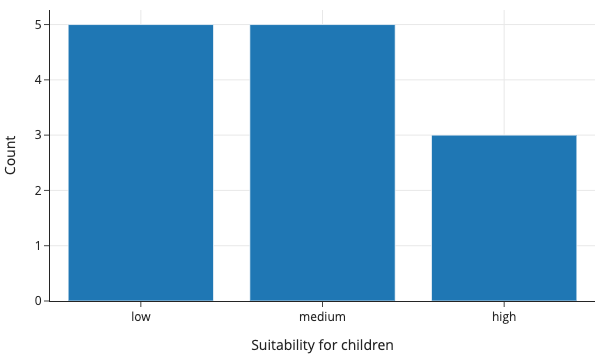

In [7]:
toy_dogs = dogs.query('group == "toy"').groupby('kids').count().reset_index()
px.bar(toy_dogs, x='kids', y='breed', width=350, height=250,
      category_orders={"kids": ["low", "medium", "high"]},
      labels={"kids": "Suitability for children", "breed": "Count"})

We do not always want to have categorical data represented by strings.
Strings generally take up more space to store, which can greatly 
increase the size of a dataset if it contains many categorical features.

At times, a qualitative feature has many categories and we prefer a higher-level view of the data, so we collapse categories. 

### Collapse categories

Let's create a new column, called `play`, to represent
the groups of dogs whose "purpose" is to play (or not). (This is a fictitious
distinction used for demonstration purposes.) This category consists of the toy
and non-sporting breeds. The new feature, `play`, is a transformation of the feature
`group` that collapses categories: toy and non-sporting are combined into one
category, and the remaining categories are placed in a second, non-play
category.  The boolean (`bool`) storage type is useful to indicate the
presence or absence of this characteristic:

In [51]:
with_play = dogs.assign(play=(dogs["group"] == "toy") |
                             (dogs["group"] == "non-sporting"))

Representing a two-category qualitative feature as a boolean has a few
advantages. For example, the mean of `play` makes sense because it returns the
fraction of `True` values. When booleans are used for numeric calculations,
`True` becomes 1 and `False` becomes 0:

In [52]:
with_play['play'].mean()

0.22093023255813954

This storage type gives us a shortcut to compute counts and averages
of boolean values. In {numref}`Chapter %s <ch:linear>`, we'll see that it's also a handy 
encoding for modeling. 

There are also times, like when a discrete quantitative feature has a long tail, that we want to truncate the higher values, which turns the quantitative feature into an ordinal. We describe this next.  

### Convert quantitative to ordinal

Finally, another transformation that we
sometimes find useful is to convert numeric values into categories. For
example, we might collapse the values in  `ailments` into categories: 0, 1, 2,
3, 4+. In other words, we turn `ailments` from a quantitative feature into an
ordinal feature with the mapping 0→0, 1→1, 2→2, 3→3, and any value 4 or larger→4+.  We might want to make this transformation because few breeds have
more than three genetic ailments. This simplification can be clearer
and adequate for an investigation.

:::{note}

As of this writing (late 2022), `pandas` also
implements a `category` `dtype` that is
designed to work with qualitative data.
However, this storage type is not yet widely
adopted by the visualization and modeling libraries, which limits its
usefulness. For that reason, we do not transform our qualitative variables into
the `category` `dtype`.
We expect that future readers may want to use the `category` `dtype` as more
libraries support it.

:::

When we convert a quantitative feature to ordinal, we lose information. We can't go back. That is, if we know the number of ailments for a breed is four or more, we can't re-create the actual numeric value.
The same thing happens when we collapse categories. For this reason, it's a good practice to keep the original feature. If we need to check our work or change categories, we can document and re-create our steps. 

In general, the feature type helps us figure out what kind of plot is most appropriate.
We discuss the mapping between feature type and plots next.

## The Importance of Feature Types

Feature types guide us in our data analysis.  They help specify the operations,
visualizations, and models we can meaningfully apply to the data.
{numref}`Table %s <feature-plot>` matches the feature type(s) to the various kinds of plots that are typically good options. Whether the variable(s) are quantitative or qualitative generally
determines the set of viable plots to make, although there are exceptions.
Other factors that enter into the decision are the number of observations and
whether the feature takes on only a few distinct values. For example, we might
make a bar chart, rather than a histogram, for a discrete quantitative variable.

:::{table} Mapping feature types to plots
:name: feature-plot

| Feature type      | Dimension | Plot     |
| :-----        |    :-----   |          :--------- |
| Quantitative      | One feature       | Rug plot, histogram, density curve, box plot, violin plot   |
| Qualitative   | One feature        | Bar plot, dot plot, line plot, pie chart      |
| Quantitative      | Two features       | Scatter plot, smooth curve, contour plot, heat map, quantile quantile plot   |
| Qualitative   | Two features        | Side-by-side bar plots, mosaic plot, overlaid lines      |
| Mixed      | Two features       | Overlaid density curves, side-by-side box plots, overlaid smooth curves, quantile quantile plot   |

:::

The feature type also helps us decide the kind of summary statistics to
calculate. With qualitative data, we usually don't compute means or standard
deviations, and instead compute the count, fraction, or percentage of records
in each category. With a quantitative feature, we compute the mean or median as
a measure of center, and, respectively, the standard deviation or inner
quartile range (75th percentile to 25th percentile) as a measure of spread.  In
addition to the quartiles, we may find other percentiles informative.

:::{note}

The *n*th percentile is that value *q* such that *n% of the data
values fall at or below it.* The value *q* might not be unique, and there are
several approaches to select a unique value from the possibilities. With enough
data, there should be little difference between these definitions.

To compute percentiles in Python, we prefer using:

```python
np.percentile(data, method='lower')
```

:::

When exploring data, we need to know how to interpret the shapes that our plots reveal.
The next three sections give guidance with
this interpretation. We also introduce many of the types of plots listed in {numref}`Table %s <feature-plot>`
through the examples. Others are introduced in {numref}`Chapter %s <ch:viz>`.